# 將資料轉成Data Frame

In [2]:
#載入套件
import pandas as pd

In [3]:
#第一種方法：將資料先轉成dictionary，再轉成data frame
data = {'weekday':['Sun','Sun','Mon','Mon'],
        'city':['Austin','Dallas','Austin','Dallas'],
        'visitor':[139,237,326,456]}

visitor_1 = pd.DataFrame(data)
visitor_1

,city,visitor,weekday
0,Austin,139,Sun
1,Dallas,237,Sun
2,Austin,326,Mon
3,Dallas,456,Mon


In [4]:
#第二種方法：利用zip()將元素轉成一個個tuple，再用dict(list(zip()))方式轉成data frame
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
visitors = [139, 237, 326, 456]

list_labels = ['city', 'weekday', 'visitor']
list_cols = [cities, weekdays, visitors]

zipped = list(zip(list_labels, list_cols))

visitors_2 = pd.DataFrame(dict(zipped))
visitors_2

,city,visitor,weekday
0,Austin,139,Sun
1,Dallas,237,Sun
2,Austin,326,Mon
3,Dallas,456,Mon


In [5]:
#想知道每個weekday的visitor的平均值，可利用groupby的方式
visitor_1.groupby('weekday')['visitor'].mean()

weekday
Mon    391
Sun    188
Name: visitor, dtype: int64

# 練習時間

在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

In [6]:
#載入隨機數值所需的numpy套件
import numpy as np

In [7]:
data = pd.DataFrame(np.random.randint(1000000,100000000,3),index=['Taiwan','United States','Thailand'])
data

,0
Taiwan,26523349
United States,72944405
Thailand,95699100


# 使用內建功能讀取 txt 檔

In [8]:
#載入套件
import os

In [9]:
#設定 data_path
dir_data = './data/'

In [10]:
data = os.path.join(dir_data, 'example.txt')
with open("data/examples/example.txt",'r') as f:
  data = f.readlines()
print(data)

['id,sex,age,score\n', '001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n', '005,M,40,60\n', '006,M,29,87']


# 將 txt 轉成 pandas dataframe

In [11]:
import pandas as pd

data = []
with open("data/examples/example.txt",'r') as f:
  for line in f:
    line = line.replace('\n','').split(',')
    data.append(line)
data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [12]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


# 將資料轉成 json 檔後輸出

##### 將 json 讀回來後，是否與我們原本想要存入的方式一樣? (以 id 為 key)

In [13]:
import json
df.to_json('data/examples/example01.json')

In [14]:
# 上面的存入方式，會將 column name 做為主要的 key, row name 做為次要的 key
with open('data/examples/example01.json', 'r') as f:
    j1 = json.load(f)
j1

{'age': {'0': '20', '1': '25', '2': '22', '3': '30', '4': '40', '5': '29'},
 'id': {'0': '001',
  '1': '002',
  '2': '003',
  '3': '004',
  '4': '005',
  '5': '006'},
 'score': {'0': '77', '1': '90', '2': '80', '3': '66', '4': '60', '5': '87'},
 'sex': {'0': 'F', '1': 'F', '2': 'M', '3': 'F', '4': 'M', '5': 'M'}}

In [15]:
df.set_index('id',inplace=True)
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


In [16]:
df.to_json('data/examples/example02.json', orient='index')

In [17]:
with open('data/examples/example02.json', 'r') as f:
    j2 = json.load(f)
j2

{'001': {'age': '20', 'score': '77', 'sex': 'F'},
 '002': {'age': '25', 'score': '90', 'sex': 'F'},
 '003': {'age': '22', 'score': '80', 'sex': 'M'},
 '004': {'age': '30', 'score': '66', 'sex': 'F'},
 '005': {'age': '40', 'score': '60', 'sex': 'M'},
 '006': {'age': '29', 'score': '87', 'sex': 'M'}}

# 將檔案存為 npy 檔

In [18]:
import numpy as np
# 將 data 的數值部分轉成 numpy array
array = np.array(data[1:])
array

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']],
      dtype='<U3')

In [19]:
np.save(arr=array, file='data/examples/example.npy')

In [20]:
array_back = np.load('data/examples/example.npy')
array_back

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']],
      dtype='<U3')

# Pickle

In [21]:
import pickle
with open('data/examples/example.pkl', 'wb') as f:
    pickle.dump(file=f, obj=data)

In [22]:
with open('data/examples/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

# 讀取圖片

常見的套件：skimage、PIL、OpenCV

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

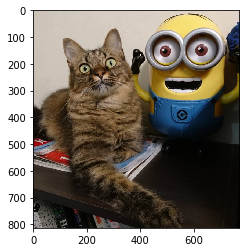

In [24]:
import skimage.io as skio
img1 = skio.imread('data/examples/example.jpg')
plt.imshow(img1)
plt.show()

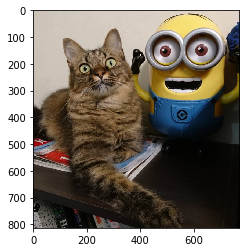

In [25]:
from PIL import Image
img2 = Image.open('data/examples/example.jpg') # 這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

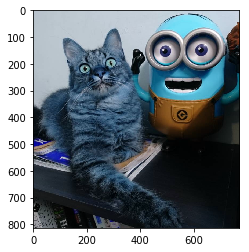

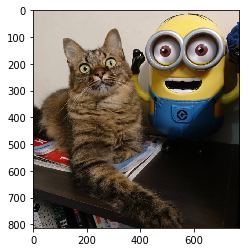

In [26]:
import cv2
img3 = cv2.imread('data/examples/example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

## 比較三種開圖方式的時間 - 比較讀取 1000 次

In [28]:
N_times = 1000

In [29]:
%%timeit
im = np.array([skio.imread('data/examples/example.jpg') for _ in range(N_times)])

23.5 s ± 983 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%%timeit
im = np.array([np.array(Image.open('data/examples/example.jpg')) for _ in range(N_times)])

24.3 s ± 1.81 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('data/examples/example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

19.4 s ± 714 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 將影像存成 mat

In [32]:
import scipy.io as sio
sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

In [33]:
mat_arr = sio.loadmat('data/examples/example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [34]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(813, 771, 3)


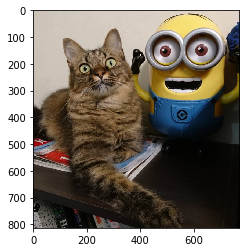

In [35]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

1-1 讀取 txt 檔
請讀取 text file
懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

In [54]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [55]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [56]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [57]:
arrange_data = [d.split('\t') for d in data]
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

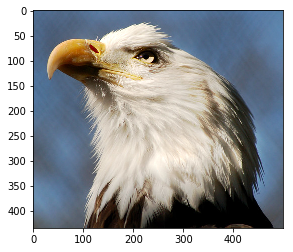

In [84]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)

In [91]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    def picture_list(link):
        try:
            response = requests.get(link)
            img = skio.imread(BytesIO(response.content))
            return img
        except:
            return None
        

    return url_list.apply(picture_list).dropna()

Total images that we got: 4 


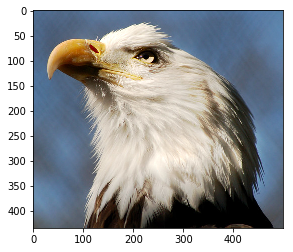

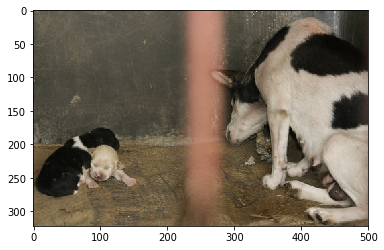

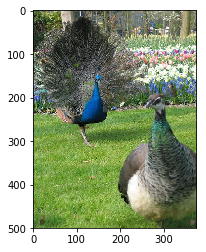

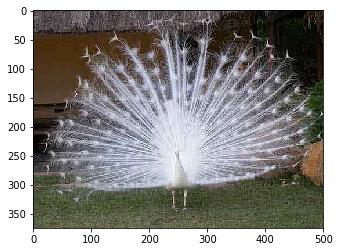

In [92]:
result = img2arr_fromURLs(df[0:5][1])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()